# Regresja liniowa binarna - własna implementacja

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def estimate_coef(x, y): #obliczenie współczynników funkcji
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

In [3]:
def plot_regression_line(x, y, b): #rysowanie regresji
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

Współczynniki regresji: b0: 1.2363636363636363, b1: 1.1696969696969697


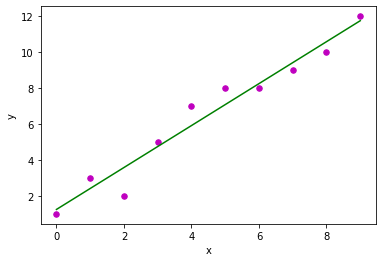

In [4]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
  
b = estimate_coef(x, y) 
print("Współczynniki regresji: b0: " + str(b[0]) + ', b1: ' + str(b[1]))

plot_regression_line(x, y, b) 

# Regresja liniowa - scikit learn

In [5]:
!git clone https://github.com/PiotrJZielinski/ml-throwdown-datasets

fatal: destination path 'ml-throwdown-datasets' already exists and is not an empty directory.


In [6]:
import pandas as pd
boston = pd.read_csv('ml-throwdown-datasets/boston.csv')
# defining feature matrix(X) and response vector(y) 
y = boston.pop('target')
X = boston

In [7]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


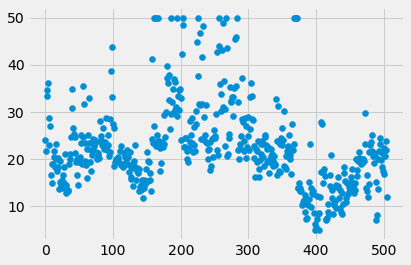

In [10]:
plt.scatter(boston.index, y)

Coefficients: 
 [-1.96617142e-03 -9.00026214e-02  6.89024296e-02  5.30863962e-02
  2.21552813e+00 -1.72093551e+01  3.64373221e+00 -4.13684361e-05
 -1.38151640e+00  3.09652276e-01 -1.18979962e-02 -8.38991404e-01
  9.41837016e-03 -5.05556991e-01]
Miary regresji: 25.11158487387638, 3.4578391761943577, 0.7219485968187573


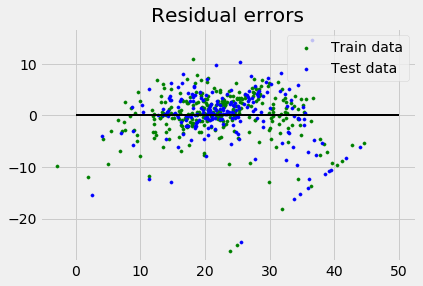

In [12]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  


#metryki zaimplementowane
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, reg.predict(X_test))
mae = mean_absolute_error(y_test, reg.predict(X_test))
r2 = r2_score(y_test, reg.predict(X_test))

print("Miary regresji: " + str(mse) + ", " + str(mae) + ", " +str(r2))


  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

# Regresja wielomianowa

3.9141768774600614
0.830358594534947


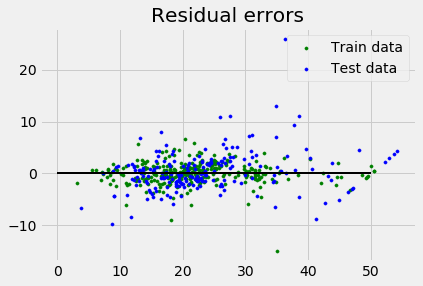

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly_test)

rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
print(rmse)
print(r2)

# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(model.predict(x_poly), model.predict(x_poly) - y_train, color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(y_poly_pred, y_poly_pred - y_test, color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

# Zadanie: odwzoruj sinusa i oblicz miary

Miary regresji: 25.11158487387638, 3.4578391761943577, 0.7219485968187573


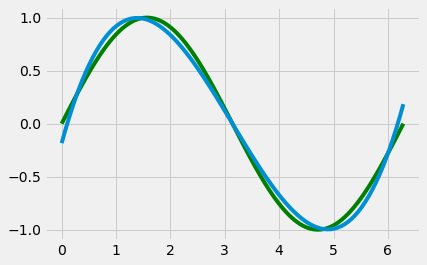

In [17]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
x = x.reshape(-1,1)
y = y.reshape(-1,1)

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly,y)
y_poly_pred = model.predict(x_poly)

#metryki zaimplementowane
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, reg.predict(X_test))
mae = mean_absolute_error(y_test, reg.predict(X_test))
r2 = r2_score(y_test, reg.predict(X_test))

print("Miary regresji: " + str(mse) + ", " + str(mae) + ", " +str(r2))

plt.plot(x, y, color='g')
plt.plot(x, y_poly_pred)